In [1]:
'''
Sources::::: 
https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

https://textblob.readthedocs.io/en/dev/quickstart.html#wordnet-integration -- spell check, word counts.
http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm -- 

'''

'\nSources::::: \nhttps://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk\nhttps://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm\n\nhttps://textblob.readthedocs.io/en/dev/quickstart.html#wordnet-integration -- spell check, word counts.\nhttp://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm -- \n\n'

In [1]:
import nltk, re, string, random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
nltk.download('twitter_samples')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist, classify, NaiveBayesClassifier
from WNAffect import wnaffect,emotion
from Lexicon import Lexicon
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import json

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\SIDDHARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIDDHARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SIDDHARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SIDDHARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIDDHARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def lemmatize_sentence(tokens):
    '''
    lemmatizing words, for e.g 'run', 'ran', 'running' is the same word.
    The lemmatizer conforms similar words to an equivalent form, or is transformed to its root form
    '''
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

def remove_noise(tweet_tokens, stop_words = ()):
    '''
    Removing stop words like 'is', 'the' etc. lemmatize_sentence() function implementation is 
    reused here.
    '''
    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

In [18]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
#text = twitter_samples.strings('tweets.20150430-223406.json')


#with open('sample_tweets.json','w') as outfile:
#    json.dump(positive_tweets,outfile)
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
print(positive_tweets[0])
print(positive_tweet_tokens[0])



#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


In [36]:
from TwitterManager import TwitterManager
tweety_after1=TwitterManager.TwitterManager('C:\\Users\\SIDDHARTHA\\Trinity\\TextAnalysis\\TextAnalysis\\Sentimentalysis\\tweets_after.csv')
print(len(tweety_after1.get_tweets_list()))
#tweet_tokens_after=tweety_after.tokenize(tweets_list_after)

36821


In [4]:
tweety_before=TwitterManager.TwitterManager('C:\\Users\\SIDDHARTHA\\Trinity\\TextAnalysis\\TextAnalysis\\Sentimentalysis\\tweets_before.csv')
tweets_list_before=tweety_before.get_tweets_list()
tweet_tokens_before=tweety_before.tokenize(tweets_list_before)
print(tweets_list_before[0])

Definitely needed. Something sinister there, looks figures were #rigged in the run in to the election, dreadful to think homelessness could be used in an attempt to thwart @FineGael &amp; @MurphyEoghan then apparent meltdown, subsequently accomplished. #GE20 #GE2020


In [35]:
print(len(tweet_tokens_after))
print(len(tweet_tokens_before))

14879
14879


In [27]:
after_cleaned_tokens_list = []
before_cleaned_tokens_list = []
stop_words = stopwords.words('english')

for tokens in tweet_tokens_after:
    after_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in tweet_tokens_before:
    before_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [33]:
all_after_words = get_all_words(after_cleaned_tokens_list)
all_before_words = get_all_words(before_cleaned_tokens_list)
freq_dist_after = FreqDist(all_after_words)
freq_dist_before = FreqDist(all_before_words)

#print(positive_cleaned_tokens_list[1])
#print(positive_cleaned_tokens_list[2])

#print(freq_dist_pos.most_common(10))
#print(freq_dist_neg.most_common(10))

print(len(after_cleaned_tokens_list))
print(len(before_cleaned_tokens_list))

14879
14879


In [29]:
'''
For positive words!
'''


from Lexicon import Lexicon
after_tokens_for_model = get_tweets_for_model(after_cleaned_tokens_list)
before_tokens_for_model = get_tweets_for_model(before_cleaned_tokens_list)

#wna = WNAffect.WNAffect('wordnet-1.6/', 'wn-domains-3.2/')
#wna = wnaffect.WNAffect('wordnet-1.6/', 'wn-domains-3.2/')
#emo = wna.get_emotion('Kill','NN')
#print(emo)


emotion_fetcher = Lexicon.Lexicon("C:/Users/SIDDHARTHA/Trinity/TextAnalysis/TextAnalysis/Sentimentalysis/NRC-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt")
#print(emotion_fetcher.get_emotion("shout"))
emotions_count_dict = {"anger":0,"anticipation":0,"disgust":0,"fear":0,"joy":0,"negative":0,"positive":0,"sadness":0,"surprise":0,"trust":0,"unclassified":0}


pos_count=0
emotions_list=[]
pos_word_list=[]
for tweet_dict in after_tokens_for_model:
    for word,tag in pos_tag(tweet_dict):
        pos_word_list.append(word)
    pos_count+=1

print(pos_word_list)

for word in pos_word_list:
    for sentiment in emotion_fetcher.get_emotion(word):
        emotions_count_dict[sentiment]+=1


print(emotions_count_dict)
print(pos_count)

.', 'keep', 'sinn', 'féin', 'safely', 'way', 'far', 'possible.', '#ge2020', '#ge20', 'remember,', 'tell', 'lie', 'get', 'elect', 'noonan', 'say', 'irish', 'people', 'responsible', 'banker', 'debt', 'promise', 'new', 'deal', 'public', 'purse', 'leave', 'pay', '42%', 'european', 'banking', 'debts.', 'nine', 'years', 'enough.', '#cblive', '#ge2020', '#ge20', '🚨beware', 'lie', 'election', '🚨', 'fg', 'make', 'commitment', 'least', 'attempt', 'renegotiate', 'cripple', 'debt,', 'enda', 'kenny', 'tell', 'us', '"we', 'never', 'look', 'debt', 'writedown"', 'we,', 'one', 'indebted', 'country', '#ge20', '#ge2020', 'brexit', 'disaster', 'us', 'ireland', '-how', 'earth', 'fg', 'think', 'spin', 'success', '??', 'help', 'succeed', '???', '#ge2020', 'tan', 'much', '#ge20', 'good', 'news.', 'louth', '#ge20', '#ge2020', 'election', 'candidates.', 'ready', 'number', 'one', 'question', 'doorstep', 'drogheda.', 'help', 'end', 'madness?', 'remember', 'add', 'yes', 'tan', '#ge2020', '#ge20', 'post', '""', 'ca

In [30]:
'''
for negative words
'''
from Lexicon import Lexicon
#positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
#negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

#wna = WNAffect.WNAffect('wordnet-1.6/', 'wn-domains-3.2/')
#wna = wnaffect.WNAffect('wordnet-1.6/', 'wn-domains-3.2/')
#emo = wna.get_emotion('Kill','NN')
#print(emo)


emotion_fetcher = Lexicon.Lexicon("C:/Users/SIDDHARTHA/Trinity/TextAnalysis/TextAnalysis/Sentimentalysis/NRC-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt")
#print(emotion_fetcher.get_emotion("shout"))
emotions_count_dict = {"anger":0,"anticipation":0,"disgust":0,"fear":0,"joy":0,"negative":0,"positive":0,"sadness":0,"surprise":0,"trust":0,"unclassified":0}


neg_count=0
emotions_list=[]
neg_word_list=[]
for tweet_dict in before_tokens_for_model:
    for word,tag in pos_tag(tweet_dict):
        neg_word_list.append(word)
    neg_count+=1

print(neg_word_list)

for word in neg_word_list:
    for sentiment in emotion_fetcher.get_emotion(word):
        emotions_count_dict[sentiment]+=1


print(emotions_count_dict)
print(neg_count)

.', 'keep', 'sinn', 'féin', 'safely', 'way', 'far', 'possible.', '#ge2020', '#ge20', 'remember,', 'tell', 'lie', 'get', 'elect', 'noonan', 'say', 'irish', 'people', 'responsible', 'banker', 'debt', 'promise', 'new', 'deal', 'public', 'purse', 'leave', 'pay', '42%', 'european', 'banking', 'debts.', 'nine', 'years', 'enough.', '#cblive', '#ge2020', '#ge20', '🚨beware', 'lie', 'election', '🚨', 'fg', 'make', 'commitment', 'least', 'attempt', 'renegotiate', 'cripple', 'debt,', 'enda', 'kenny', 'tell', 'us', '"we', 'never', 'look', 'debt', 'writedown"', 'we,', 'one', 'indebted', 'country', '#ge20', '#ge2020', 'brexit', 'disaster', 'us', 'ireland', '-how', 'earth', 'fg', 'think', 'spin', 'success', '??', 'help', 'succeed', '???', '#ge2020', 'tan', 'much', '#ge20', 'good', 'news.', 'louth', '#ge20', '#ge2020', 'election', 'candidates.', 'ready', 'number', 'one', 'question', 'doorstep', 'drogheda.', 'help', 'end', 'madness?', 'remember', 'add', 'yes', 'tan', '#ge2020', '#ge20', 'post', '""', 'ca

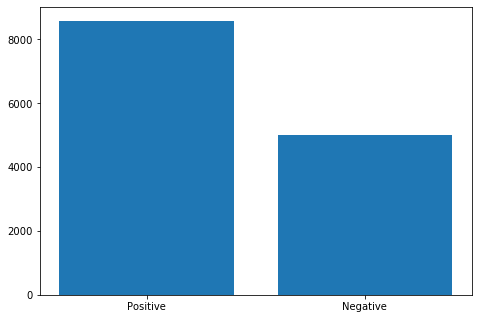

In [24]:
fig = plt.figure()
tweet_type = ['After','Before']
tweet_counts = [pos_count,neg_count]
ax = fig.add_axes([0,0,1,1])
ax.bar(tweet_type,tweet_counts)
plt.show()

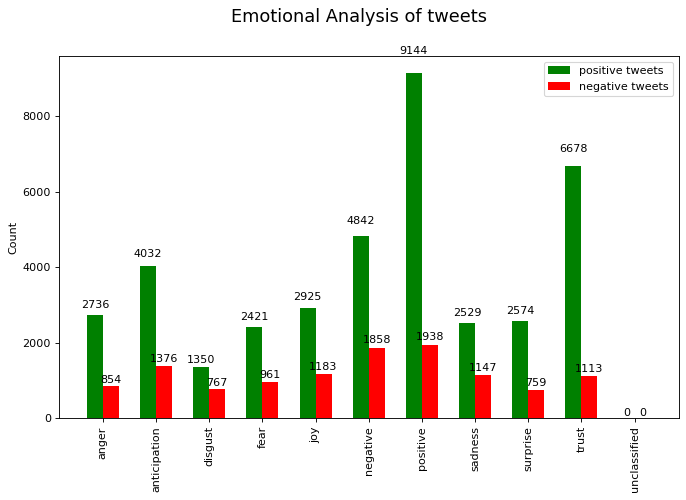

In [25]:

emotions_pos = {'anger': 5336, 'anticipation': 7524, 'disgust': 2685, 'fear': 4806, 'joy': 5458, 'negative': 9532, 'positive': 16463, 'sadness': 5253, 'surprise': 4732, 'trust': 11512, 'unclassified': 0}

emotions_neg = {'anger': 5336, 'anticipation': 7524, 'disgust': 2685, 'fear': 4806, 'joy': 5458, 'negative': 9532, 'positive': 16463, 'sadness': 5253, 'surprise': 4732, 'trust': 11512, 'unclassified': 0}

emotions_colors = {'anger': 'red', 'anticipation': 'purple', 'disgust': 'yellow', 'fear': 'indigo', 'joy': 'green', 'negative': 'black', 'positive': 'pink', 'sadness': 'blue', 'surprise': 'maroon', 'trust': 'orange', 'unclassified': 'cyan'}
#labels = list(emotions_colors.keys())
#handles = [plt.Rectangle((1,1),1,1, color=emotions_colors[label]) for label in labels]
my_cmap = cm.get_cmap('jet')
ind = np.arange(len(emotions_pos))
width=0.3
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Emotional Analysis of tweets', fontsize=16)
ax = fig.add_subplot(111)
pos_bars=ax.bar(ind, list(emotions_pos.values()),width,color='g',align='center')
neg_bars=ax.bar(ind+width, list(emotions_neg.values()),width,color='r', align='center')
ax.set_ylabel('Count')
ax.set_xticklabels(list(emotions_pos.keys()), rotation=90)
ax.set_xticks(ind+width/2)
ax.legend( (pos_bars[0], neg_bars[0]), ('After', 'Before') )

def autolabel(bars):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(pos_bars)
autolabel(neg_bars)

plt.show()

In [20]:
positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

print(positive_dataset)
print(negative_dataset)

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

#70:30 split
train_data = dataset[:7000]
test_data = dataset[7000:]   

print(train_data)
print(test_data)

'xx': True}, 'Positive'), ({'bed': True, 'best': True, 'couple': True, 'ever': True, ':)': True}, 'Positive'), ({'favorite': True, 'apple': True, 'sauce': True, ':)': True}, 'Positive'), ({'nice': True, 'holiday': True, 'honey': True, ':-)': True, 'kisses': True}, 'Positive'), ({'follow': True, 'back': True, 'pleasse': True, ':)': True}, 'Positive'), ({'thakyou': True, 'sir': True, ':)': True}, 'Positive'), ({'thank': True, 'beatriz': True, ':)': True}, 'Positive'), ({'rt': True, 'bailona': True, 'group': True, 'chat': True, 'mention': True, 'approve': True, 'fanbase': True, ':)': True}, 'Positive'), ({'party': True, 'cancel': True, ':p': True, '#bajrangibhaijaanhighestweek1': True}, 'Positive'), ({'thanks': True, 'follow': True, ':-)': True, 'hope': True, 'great': True, 'week': True}, 'Positive'), ({'puff': True, 'pastry': True, 'egg': True, 'tart': True, 'hot': True, 'fresh': True, 'oven': True, ':)': True, 'wan': True, 'chai': True, 'mtr': True}, 'Positive'), ({'thank': True, 'follo

NameError: name 'negative_dataset' is not defined

In [ ]:
classifier = NaiveBayesClassifier.train(train_data)

In [ ]:
print("Accuracy is:", classify.accuracy(classifier, test_data))
print(classifier.show_most_informative_features(10))